# Introduction to Machine Learning 

1. What is ML?
2. Supervised learning vs unsupervised learning
3. Intuitive methods of evaluating data before algorithmic processing
4. Feature extraction and dimensionality reduction
5. Evaluation of models

### Linear Regression example

Stock market prediction using linear regression

In [7]:
import pandas.io.data as web
import pandas as pd

In [4]:
import datetime

In [5]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 8, 26)

In [6]:
aapl = web.DataReader("aapl", 'google', start, end)

In [62]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,111.39,111.44,107.35,109.33,53204626
2015-01-05,108.29,108.65,105.41,106.25,64285491
2015-01-06,106.54,107.43,104.63,106.26,65797116
2015-01-07,107.20,108.20,106.70,107.75,40105934
2015-01-08,109.23,112.15,108.70,111.89,59364547


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb07748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d063780>]], dtype=object)

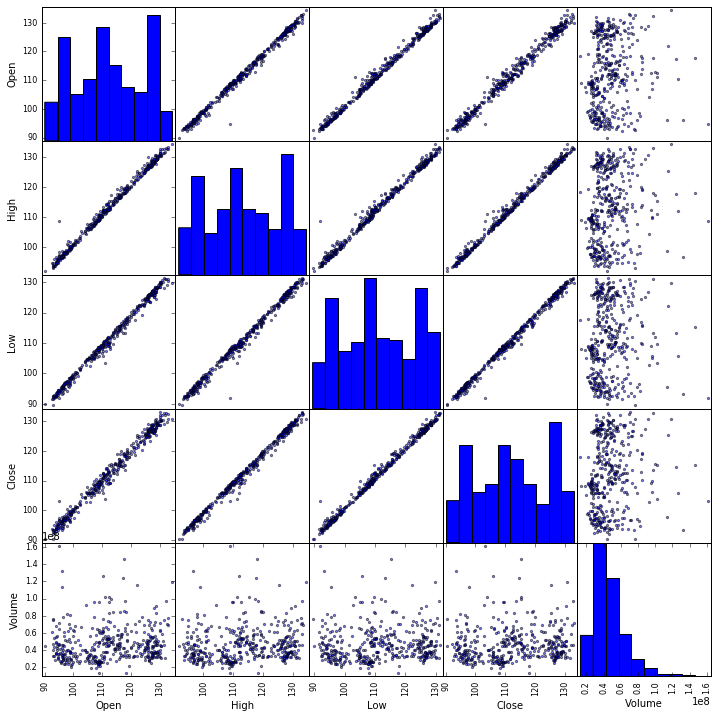

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.scatter_matrix(aapl,figsize=(12,12))
# plt.scatter(aapl['Open'],aapl['Close'])

In [63]:
y = aapl['Close']
X = aapl.drop('Close',1).drop('Volume',1)

In [10]:
from sklearn import linear_model

In [11]:
lr = linear_model.LinearRegression()

In [12]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lr.predict(X[:5])

array([ 108.09781516,  106.22914585,  105.72768918,  107.66689332,
        111.22505675])

In [14]:
y[:5]

Date
2015-01-02    109.33
2015-01-05    106.25
2015-01-06    106.26
2015-01-07    107.75
2015-01-08    111.89
Name: Close, dtype: float64

In [15]:
lr.coef_

array([-0.6540653 ,  0.80947361,  0.84424761])

In [16]:
lr.intercept_

0.11642864668786501

In [17]:
lr.score(X,y)

0.99736521788215859

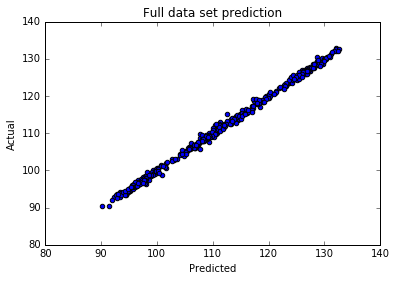

In [59]:
plt.scatter(lr.predict(X),y)
plt.title('Full data set prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In this case, we see a really high accuracy. However this could also be a problem of overfitting since we are predicting data that the model has already seen! Let us try and solve this problem

In [19]:
from sklearn.cross_validation import train_test_split

Here, we split the data set into 

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [21]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lr.coef_

array([-0.63420065,  0.7958915 ,  0.83640313])

In [23]:
lr.intercept_

0.30824898412078028

In [25]:
lr.score(X_test,y_test)

0.99796109660858212

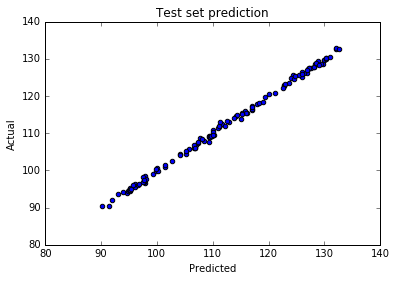

In [61]:
plt.scatter(lr.predict(X_test),y_test)
plt.title('Test set prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As a final check, let's perform cross validation as explained!

In [49]:
from sklearn.cross_validation import cross_val_score,cross_val_predict

In [50]:
cv_scores = cross_val_score(lr,X,y,cv=5)

In [51]:
cv_scores

array([ 0.99354994,  0.9898003 ,  0.96918182,  0.98917791,  0.99219635])

In [52]:
import numpy as np
mean_cv_score = np.mean(cv_scores)
print(mean_cv_score)

0.986781263429


This is a more meaningful score!

In [53]:
cv_predicted = cross_val_predict(lr,X,y,cv=5)

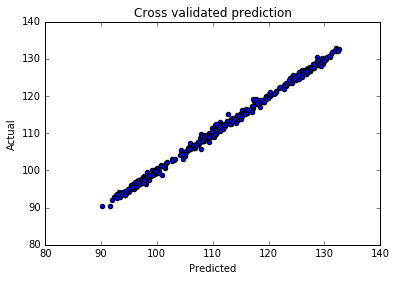

In [60]:
plt.scatter(cv_predicted,y)
plt.title('Cross validated prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Let us look at a few metrics of our model..

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [65]:
mean_absolute_error(y_test,lr.predict(X_test))

0.44204290568890975

In [66]:
mean_squared_error(y_test,lr.predict(X_test))

0.30246833472445489

In [67]:
explained_variance_score(y_test,lr.predict(X_test))

0.99797075104233979

**Warning!** Stock market prediction is done to explain regression, yet, this is not the best way to perform stock market prediction..